# PROJECT REPORT GROUP 26

## Impact of Cholesterol Levels and Maximum Heart Rate Achieved on Heart Disease

### Introduction

Heart disease is one of the leading causes of death around the globe (Fillmore et al., 2014). Several factors can increase the likelihood of developing heart diseases, such as age, high blood pressure, high cholesterol levels, maximum heart rate, diabetes, obesity and family history. (Dahlöf, 2010; Diller et al., 2006; Stubbs et al., 2015).

In this project, we aim to investigate the impact of cholesterol levels and maximum heart rate on the chances of developing heart disease. Therefore, the main question we will try to answer with our project is: "Do cholesterol levels and maximum heart rate achieved affect the likelihood of developing heart disease?" To do this, we will build a K-nearest neighbors classification model to predict the diagnosis using cholesterol level and maximum heart rate achieved predictor variables.

The dataset we are using is collected by the University of California, Irvine, and contains data on 303 individuals and 14 different variables. Demographic and clinical measurements include age, sex, chest pain type, resting blood pressure, and serum cholesterol in mg/dL, among others (Dua & Graff, 2019).

### Methods and Results

The necessary libraries are loaded below.


In [93]:
#Load this before continuing
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)

The dataset is loaded from the website onto Jupyter.


In [94]:
#Reading data into R

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cleveland_heart <- read_csv(url)
head(cleveland_heart)


New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


The dataset was then given column names corresponding to those on the website.


In [95]:
#Change column names to given variables from dataset

colnames(cleveland_heart) <- c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol_level", "fasting_blood_sugar", "resting_electrocardiographic_results", "maximum_heart_rate_achieved", "exercise_induced_angina", "oldpeak", "slope", "major_vessels_colored", "thal", "diagnosis")
head(cleveland_heart)


age,sex,chest_pain,resting_blood_pressure,cholesterol_level,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,major_vessels_colored,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


Previous studies such as Diller et al. (2006) and Stubbs et al. (2015) found various risk factors for heart disease, including age, family history and obesity, among others. The risk factors that appeared in both the dataset and the studies included age, resting blood pressure, cholesterol level, and maximum heart rate. Age, resting blood pressure, cholesterol level, and maximum heart rate variables were then selected, along with the diagnosis variable, to be wrangled into a tidy format.


In [96]:
#Selecting our relevant variables into a tidy format

heart_clean <- cleveland_heart |>
select(age, resting_blood_pressure, cholesterol_level, maximum_heart_rate_achieved, diagnosis)
head(heart_clean)


age,resting_blood_pressure,cholesterol_level,maximum_heart_rate_achieved,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
67,160,286,108,2
67,120,229,129,1
37,130,250,187,0
41,130,204,172,0
56,120,236,178,0
62,140,268,160,3


The diagnosis variable is then mutated such that it only outputs TRUE or FALSE to indicate whether heart disease is present or not, with TRUE indicating the presence of one and FALSE indicating the absence.


In [97]:
#Change diagnosis to FALSE for no heart diagnosis and TRUE for any heart diagnosis
heart_data <- heart_clean |>
mutate(diagnosis = (diagnosis != 0)) |>
mutate("diagnosis" = as_factor(diagnosis))
head(heart_data)

age,resting_blood_pressure,cholesterol_level,maximum_heart_rate_achieved,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,160,286,108,TRUE
67,120,229,129,TRUE
37,130,250,187,FALSE
41,130,204,172,FALSE
56,120,236,178,FALSE
62,140,268,160,TRUE


The data is now split up into training and testing data, with 75% going into the training data. The diagnosis variable is set as the target variable.


In [98]:
#Split data into training and testing

set.seed(1976)

heart_data_split <- initial_split(heart_data, prop = 0.75, strata = diagnosis)
heart_data_train <- training(heart_data_split)
heart_data_test <- testing(heart_data_split)

Table 1 is created below as a summary of the data set, showing the mean of all of the variables for both levels of diagnosis and whether any of the variables have any missing data.


In [99]:
#Creating data summary table of training data

heart_table <- heart_data_train |>
group_by(diagnosis) |>
summarize(num_obs = n(),
mean_age = mean(age, na.rm = TRUE),
mean_cholesterol = mean(cholesterol_level, na.rm = TRUE),
mean_blood_pressure = mean(resting_blood_pressure, na.rm = TRUE),
mean_max_hr_achieved = mean(maximum_heart_rate_achieved, na.rm = TRUE),
num_missing = sum((is.na(age)) + sum(is.na(cholesterol_level)) + sum(is.na(maximum_heart_rate_achieved))+ sum(is.na(resting_blood_pressure))))
heart_table


diagnosis,num_obs,mean_age,mean_cholesterol,mean_blood_pressure,mean_max_hr_achieved,num_missing
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,122,52.40984,236.9508,128.2787,157.0082,0
TRUE,104,56.71154,248.3173,133.3077,138.7404,0


**Table 1: Mean values of each predictor chosen for the presence (TRUE) or absence (FALSE) of heart disease**

Table 1 showed that the mean age and mean resting blood pressure were only separated by a small margin of about four or five units between the two levels of diagnosis. This indicates that they may not be strong predictor variables to use in the classification because they are too similar between the two levels of diagnosis. The mean for cholesterol levels and maximum heart rate achieved were separated by over ten units between the two levels of diagnosis, showing good separation between the diagnosis levels.

To further analyze what predictor variables to use in our classification model, we plotted cholesterol levels, blood pressure, and maximum heart rate against age to see if they would be useful in predicting whether someone has a heart disease. We plotted these variables against age because Rodgers et al. (2019) determined that cardiac risk factors increase as you age. Each of these three plots was also separated by the diagnosis variable using the faucet_wrap() function. We did this to determine where each level of the diagnosis variable localizes on the variable range, and we could use this information to choose our predictors. Figure 1 below visualizes the effects age and cholesterol have on the presence of a heart diagnosis.


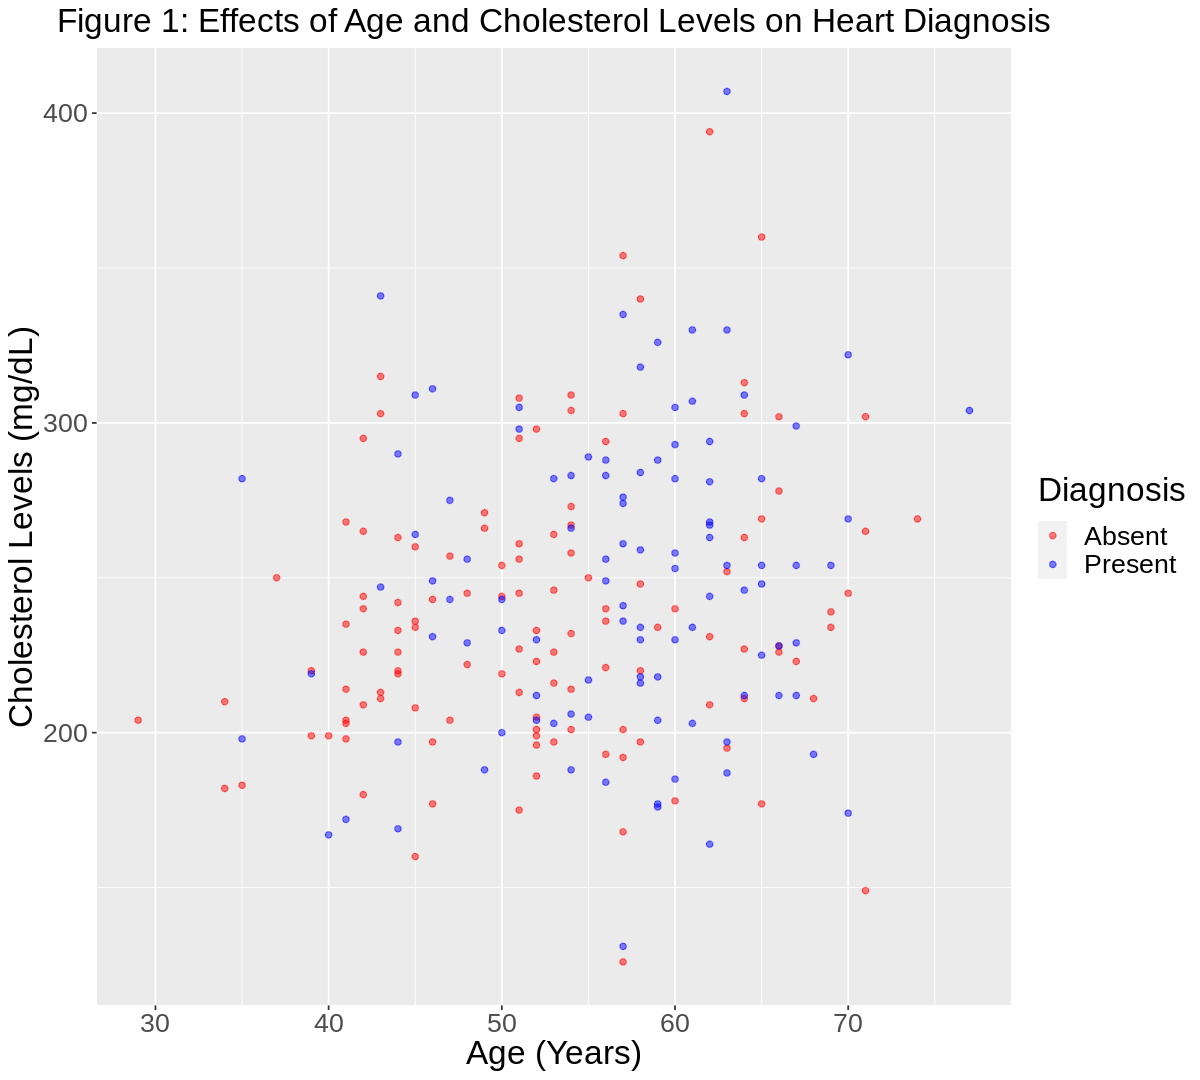

In [100]:
#Creating a plot to visualize effects of age and cholesterol levels

options(repr.plot.width = 10, repr.plot.height = 9)

cholesterol_data_plot <- heart_data_train |>
ggplot(aes(x = age, y = cholesterol_level, color = diagnosis)) +
geom_point(alpha = 0.5) +
labs(title = "Figure 1: Effects of Age and Cholesterol Levels on Heart Diagnosis", x = "Age (Years)", y = "Cholesterol Levels (mg/dL)", color = "Diagnosis") +
scale_color_manual(labels = c("Absent", "Present"), values = c("red", "blue")) +
theme(plot.title = element_text(hjust = 0.5, size = 20),
axis.title.x = element_text(size = 20),
axis.title.y = element_text(size = 20),
text = element_text(size = 20))
cholesterol_data_plot

Figure 1 shows the distribution of cholesterol level and age, but it is hard to see the difference between the levels of the diagnosis variable. We then used the faucet_wrap() function to separate the two levels of diagnosis, shown in Figure 2.


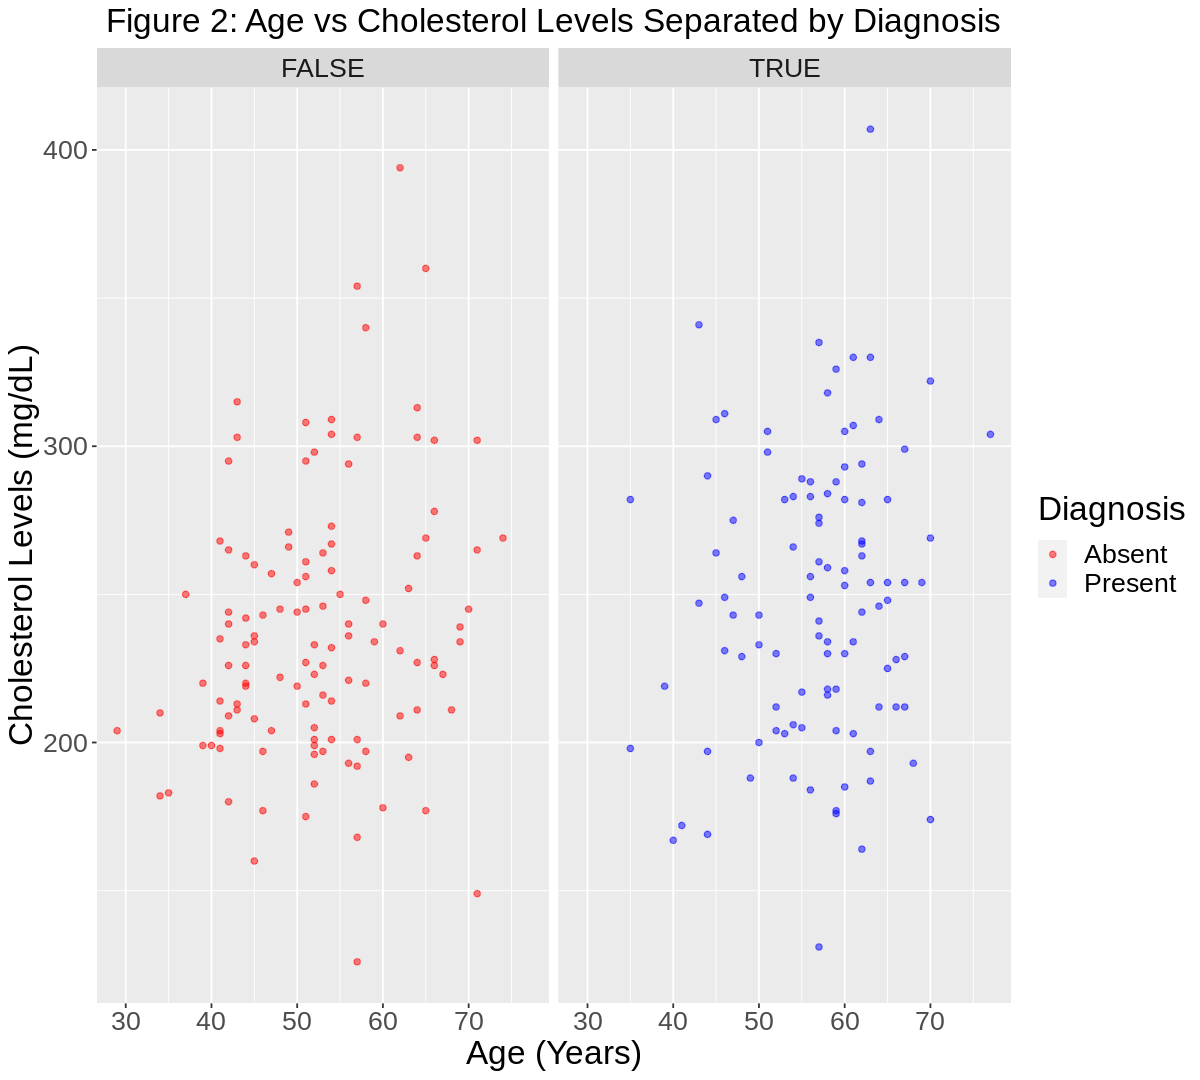

In [101]:
#Separate the patient populations into ones with or without a diagnosis

cholesterol_plot_wrapped <- cholesterol_data_plot +
facet_wrap(~diagnosis) + 
labs(title = "Figure 2: Age vs Cholesterol Levels Separated by Diagnosis")
cholesterol_plot_wrapped

After separating the two levels, we can see that the data points of the two levels of the diagnosis variable localize in different areas. The absence of a diagnosis is typically in the lower age range, while the presence of a diagnosis is in the higher age range. There is some separation between the two levels of diagnosis. We then produced Figure 3 to understand the effects of age and blood pressure on the presence of a heart diagnosis.


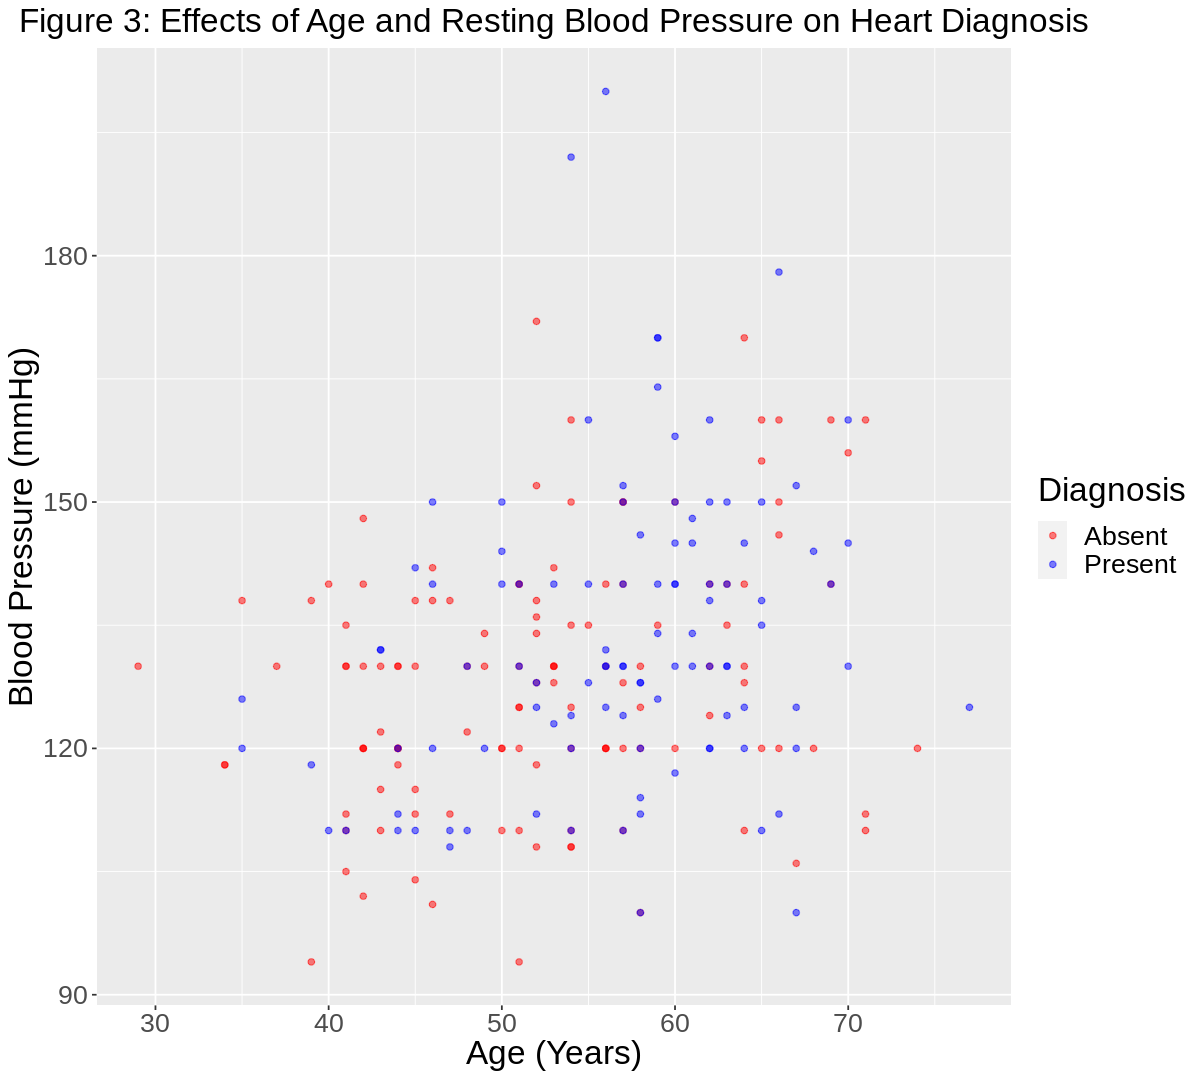

In [102]:
#Creating a plot to visualize effects of age and blood pressure levels

options(repr.plot.width = 10, repr.plot.height = 9)

bp_data_plot <- heart_data_train |>
ggplot(aes(x = age, y = resting_blood_pressure, color = diagnosis)) +
geom_point(alpha = 0.5) +
labs(title = "Figure 3: Effects of Age and Resting Blood Pressure on Heart Diagnosis", x = "Age (Years)", y = "Blood Pressure (mmHg)", color = "Diagnosis") +
scale_color_manual(labels = c("Absent", "Present"), values = c("red", "blue")) +
theme(plot.title = element_text(hjust = 0.5, size = 20),
axis.title.x = element_text(size = 20),
axis.title.y = element_text(size = 20),
text = element_text(size = 20))
bp_data_plot

Figure 3 shows the distribution of blood pressure and age, but it is hard to see the difference between the levels of the diagnosis variable. We then used the faucet_wrap() function again to separate the two levels of diagnosis, shown in Figure 4.


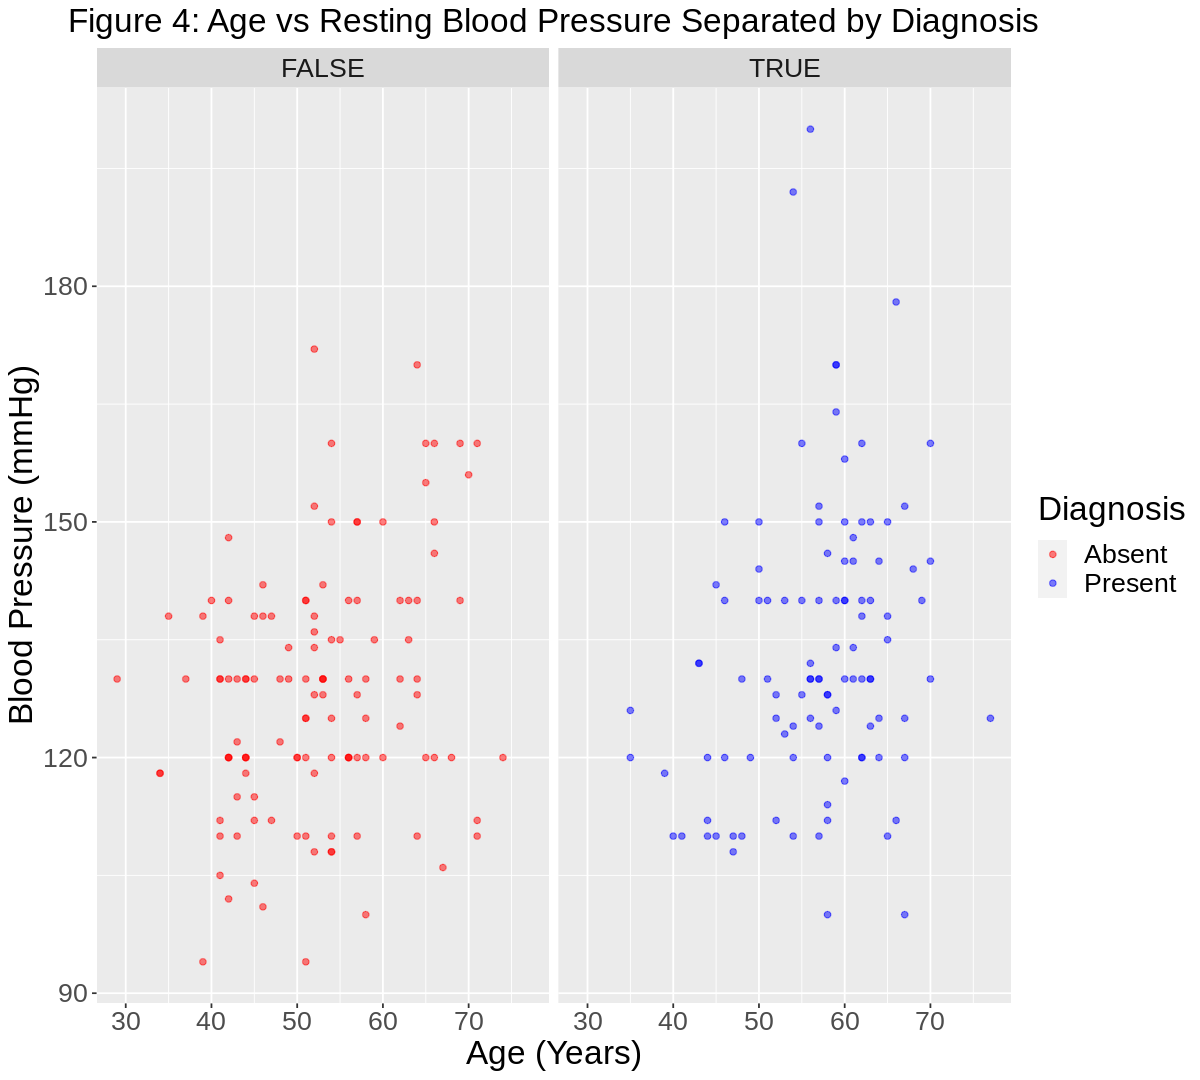

In [103]:
bp_plot_wrapped <- bp_data_plot +
facet_wrap(~diagnosis) +
labs(title = "Figure 4: Age vs Resting Blood Pressure Separated by Diagnosis")
bp_plot_wrapped

After separating the two levels, we can see that the data points of the two levels of the diagnosis variable do not localize in different areas. The absence and presence of a diagnosis occupy the same range in Figure 4. There is almost no separation between the two levels of diagnosis. We then produced Figure 5 to understand the effects of age and maximum heart rate achieved on the presence of a heart diagnosis.


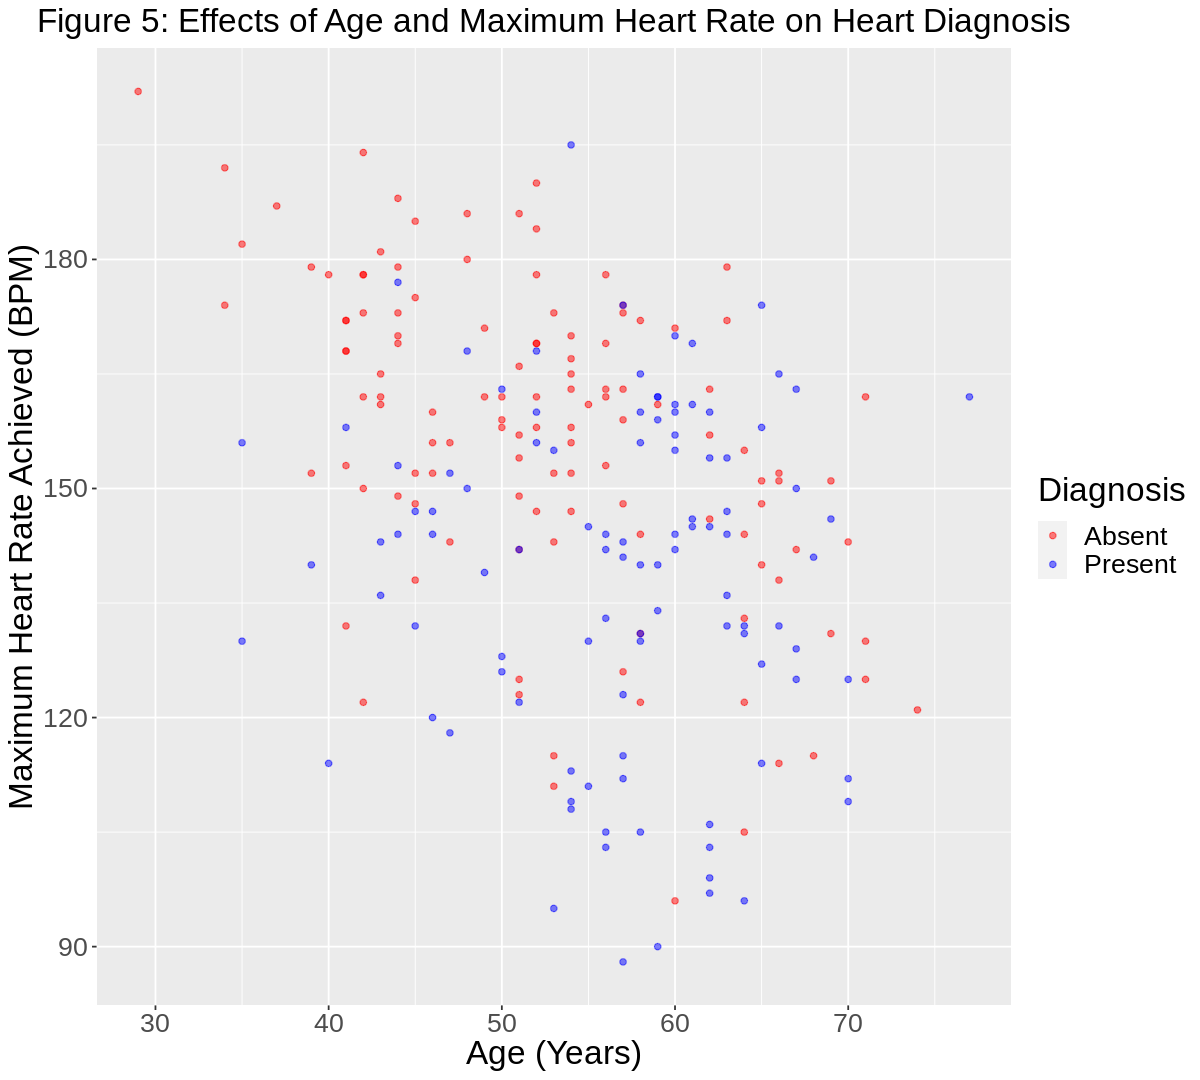

In [104]:
#Creating a plot to visualize effects of age and max heart rate achieved

options(repr.plot.width = 10, repr.plot.height = 9)

hr_data_plot <- heart_data_train |>
ggplot(aes(x = age, y = maximum_heart_rate_achieved, color = diagnosis)) +
geom_point(alpha = 0.5) +
labs(title = "Figure 5: Effects of Age and Maximum Heart Rate on Heart Diagnosis", x = "Age (Years)", y = "Maximum Heart Rate Achieved (BPM)", color = "Diagnosis") +
scale_color_manual(labels = c("Absent", "Present"), values = c("red", "blue")) +
theme(plot.title = element_text(hjust = 0.5, size = 20),
axis.title.x = element_text(size = 20),
axis.title.y = element_text(size = 20),
text = element_text(size = 20))
hr_data_plot


Figure 5 shows the distribution of maximum heart rate achieved and age, but it is hard to see the difference between the levels of the diagnosis variable. We then used the faucet_wrap() function to separate the two levels of diagnosis, shown in Figure 6.


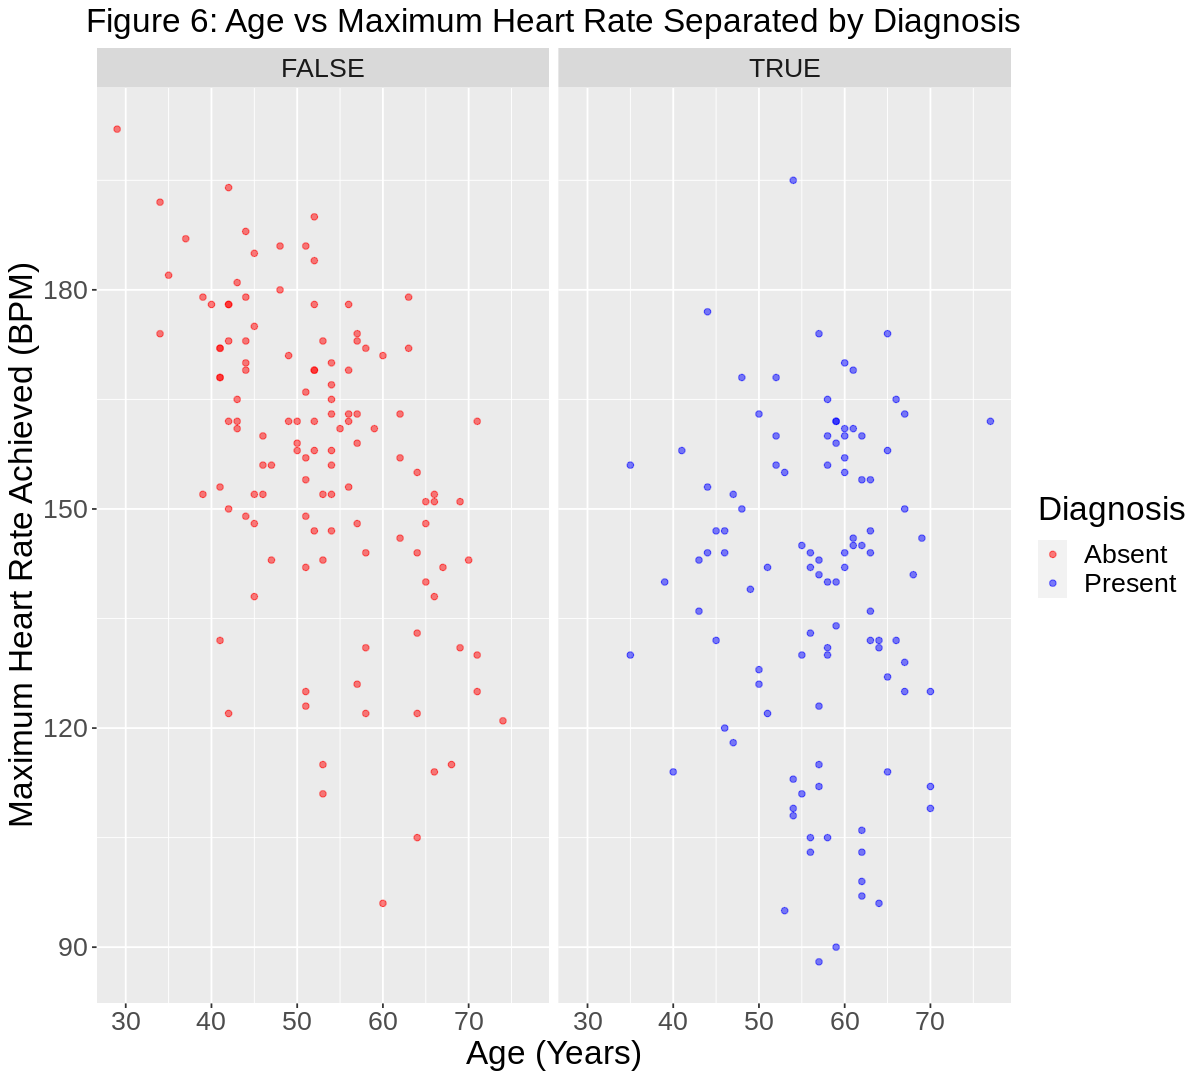

In [105]:
hr_plot_wrapped <- hr_data_plot +
facet_wrap(~diagnosis)+
labs(title = "Figure 6: Age vs Maximum Heart Rate Separated by Diagnosis")
hr_plot_wrapped

After separating the two levels, we can see that the data points of the two levels of the diagnosis variable localize in different areas. The data points without a diagnosis present are typically found in the higher BPM values for the maximum heart rate achieved variable. The data points with a diagnosis are typically found in the lower BPM values for the maximum heart rate achieved variable. There is some good separation between the two levels of diagnosis.

By combining the exploratory data analysis in Figures 1-6 and Table 1, we could decide which predictor variables to use for our model. The figures and the table showed that the variables maximum heart rate achieved and cholesterol level show good separation between the two levels of the diagnosis target variable. The variables age and resting blood pressure show poor separation between the two levels of the target variable. Thus, we used cholesterol level and maximum heart rate achieved to create our classification model. We then built our K-nearest neighbours classification model and used cross-validation first to tune our model to find the best K-value. For our 10-fold cross-validation, we used a range of K-values from 1-20, increasing by 1 to find the best number of neighbors to use.


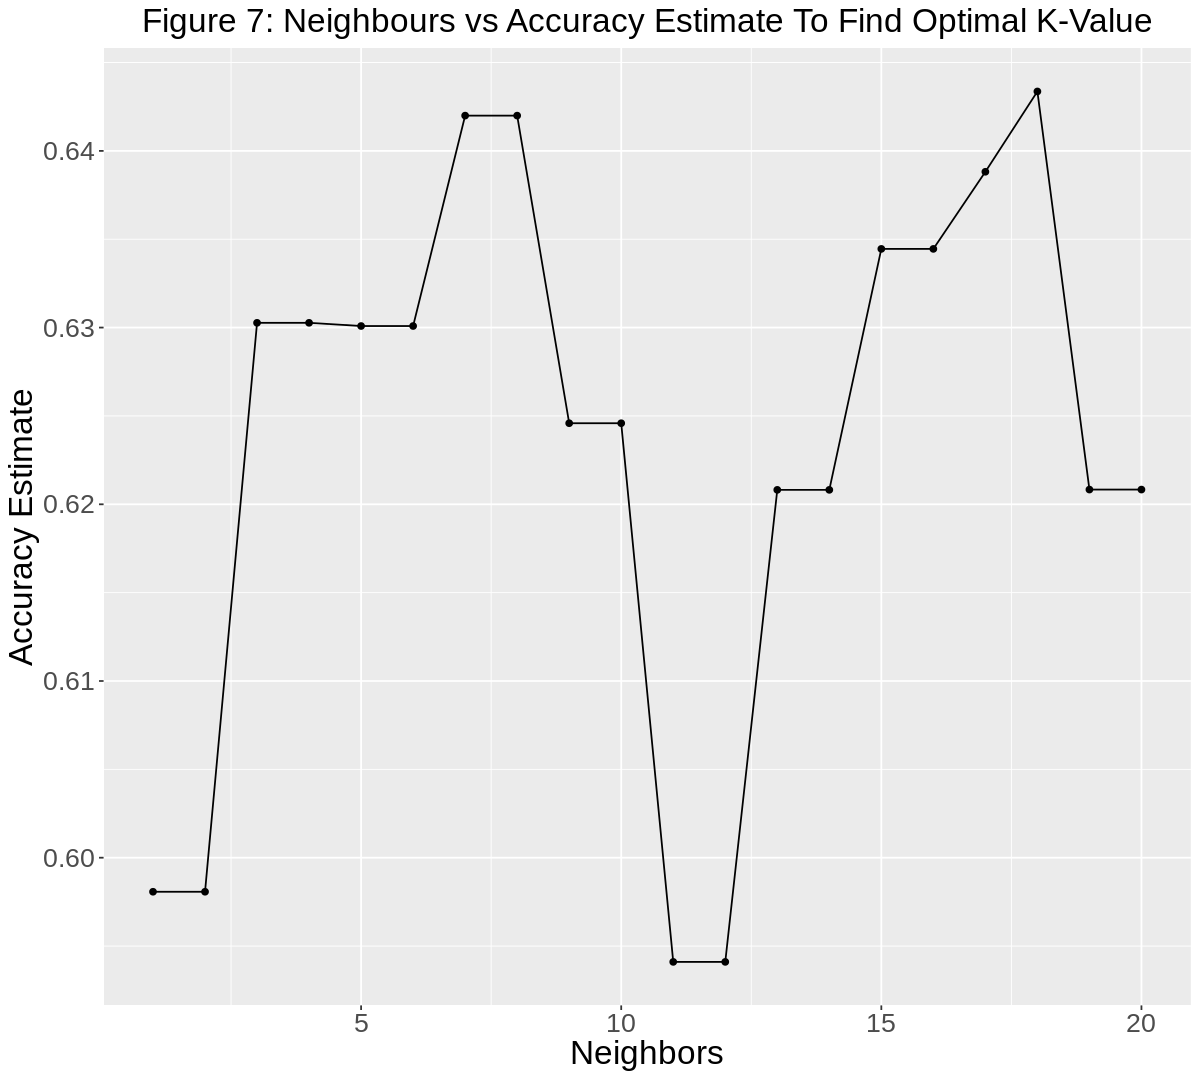

In [106]:
#cross validation model

set.seed(1976)

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

heart_recipe <- recipe(diagnosis ~ cholesterol_level + maximum_heart_rate_achieved, data = heart_data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

heart_vfold <- vfold_cv(heart_data_train, v = 10, strata = diagnosis)

gridvals <- tibble(neighbors = seq(1, 20, 1))

heart_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(heart_spec) |>
  tune_grid(resamples = heart_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

cross_val_plot <- heart_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 7: Neighbours vs Accuracy Estimate To Find Optimal K-Value") +
    theme(text = element_text(size = 20),
         plot.title = element_text(hjust = 0.5, size = 20))
cross_val_plot


After finding from the plot that the best K-value is 18, we used it in the K-nearest neighbours algorithm to build our classifier, with the target variable being diagnosis and the predictor variables being cholesterol level and maximum heart rate achieved.


In [107]:
k_max <- heart_results |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)

heart_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_max) |>
  set_engine("kknn") |>
  set_mode("classification")

heart_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(heart_best_spec) |>
  fit(data = heart_data_train)

heart_predictions <- predict(heart_fit, heart_data_test) |> 
    bind_cols(heart_data_test)

heart_proportions <- heart_data_train |>
                      group_by(diagnosis) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_data_train))

heart_proportions

diagnosis,n,percent
<fct>,<int>,<dbl>
FALSE,122,53.9823
TRUE,104,46.0177


**Table 2: Majority classifier showing the majority class label from training data**

The majority classifier was produced in Table 2, which is a tool we will use to compare our accuracy against. The majority classifier accuracy is 54%.

In [108]:
heart_acc <- heart_predictions |> 
    metrics(truth = diagnosis, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)
heart_acc

.metric,.estimate
<chr>,<dbl>
accuracy,0.7236842


**Table 3: Accuracy of the classification model**

Table 3 shows the accuracy of our classifier, which was determined to be 72%. The 72% accuracy of the model is significantly higher than the 54% our majority classifier would have given us.


In [109]:
heart_cm <- heart_predictions |> 
    conf_mat(truth = diagnosis, estimate = .pred_class)
heart_cm

          Truth
Prediction FALSE TRUE
     FALSE    32   12
     TRUE      9   23

**Table 4: Confusion matrix of the classification model**

Table 4 shows the confusion matrix. It shows that there were 17 instances that our classifier misclassified the diagnosis. There were 9 cases with no diagnosis, but our classifier decided that a heart disease was present. There were also 12 cases with a diagnosis, but the classifier decided that a heart disease was not present.

Finally, we produced Figure 8, which allows us to visualize our classification model as a whole. Figure 8 helps us understand what our classifier would predict the diagnosis if we were given certain values for cholesterol levels and the maximum heart rate achieved.


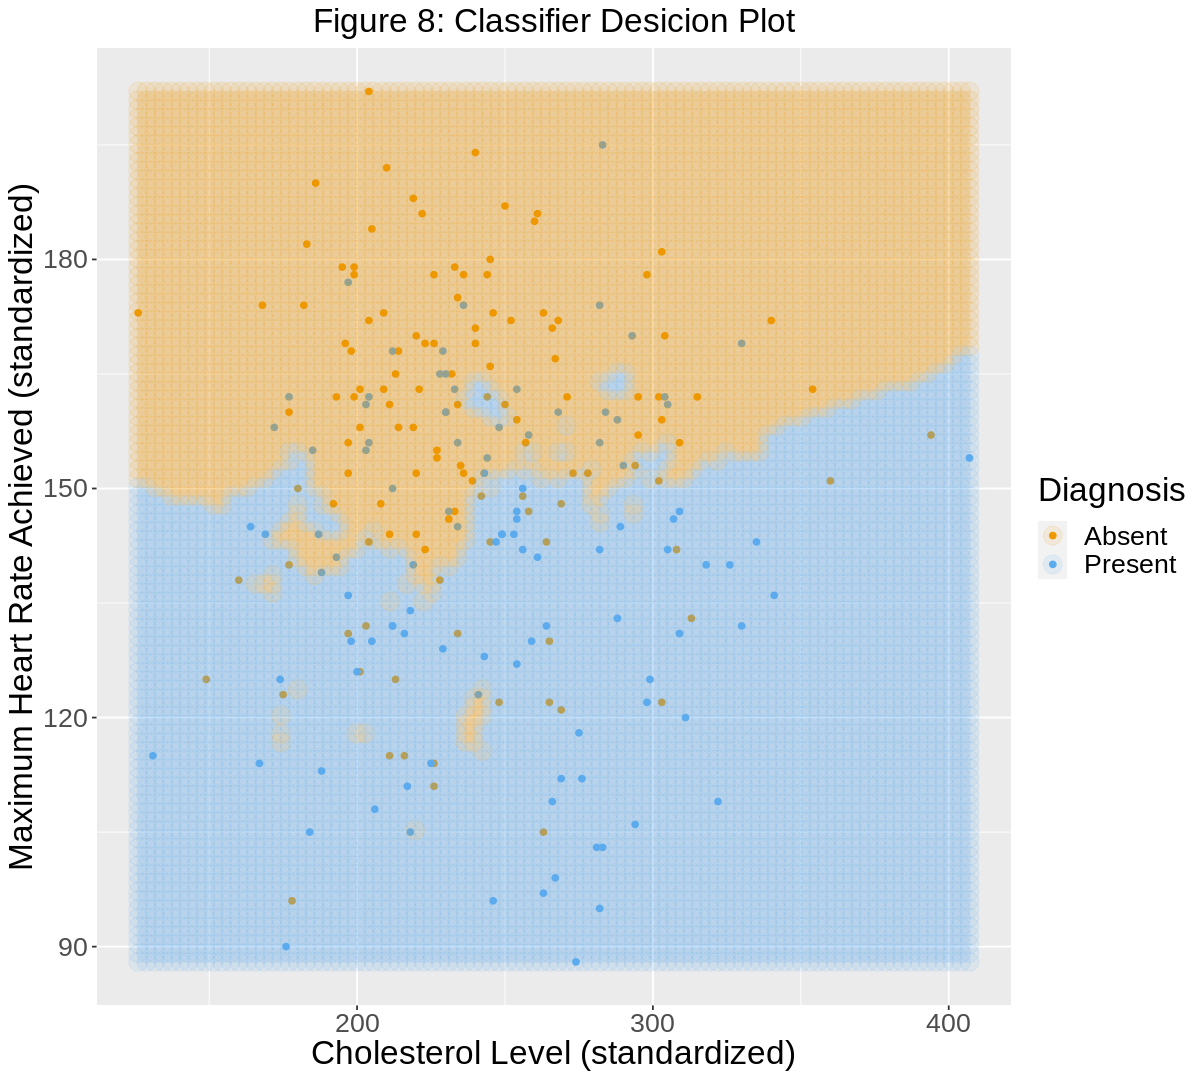

In [110]:
chl_grid <- seq(min(heart_data_train$cholesterol_level), 
                max(heart_data_train$cholesterol_level), 
                length.out = 100)
hr_grid <- seq(min(heart_data_train$maximum_heart_rate_achieved),
               max(heart_data_train$maximum_heart_rate_achieved),
                length.out = 100)
                
asgrid <- as_tibble(expand.grid(cholesterol_level = chl_grid, 
                                maximum_heart_rate_achieved = hr_grid))

PredGrid <- predict(heart_fit, asgrid)

prediction_table <- bind_cols(PredGrid, asgrid) |> 
rename(diagnosis = .pred_class)

wkflw_plot <- ggplot() +
geom_point(data = heart_data_train, mapping = aes(x = cholesterol_level, y = maximum_heart_rate_achieved, color = diagnosis), alpha = 2) +
geom_point(data = prediction_table, mapping = aes(x = cholesterol_level, y = maximum_heart_rate_achieved, color = diagnosis), alpha = 0.1, size = 5) +
labs(color = "Diagnosis", x = "Cholesterol Level (standardized)", y = "Maximum Heart Rate Achieved (standardized)", title = "Figure 8: Classifier Desicion Plot") +
scale_color_manual(labels = c("Absent", "Present"), values = c("orange2", "steelblue2")) +
theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5, size = 20))

wkflw_plot

### Discussion
**Summary of Findings**

Our project initially aimed to investigate the impact of age and cholesterol levels on the diagnosis of heart disease using the K-nearest neighbour classification model. During our exploratory analysis, we found that the means for age and resting blood pressure were similar between the two levels of diagnosis, indicating that they may not be strong predictor variables. Instead, we chose to use cholesterol levels and maximum heart rate as our predictor variables, as the means for these variables had a greater difference. Thus, our data analysis focused on the revised question, "Does cholesterol level and maximum heart rate have an impact on the diagnosis of heart disease?". Based on this question, we expected a positive relationship between cholesterol and heart disease and a negative relationship between maximum heart rate and heart disease (Diller et al., 2006; Stubbs et al., 2015). With increasing cholesterol and decreasing heart rate, we expected an increased likelihood of heart disease.

Through 10-fold cross-validation, we tuned our model, which resulted in a k-value of 18. Using our new predictor variables, our classifier achieved an accuracy of 72%, which was better than the majority classifier's accuracy of 54%. Using ggplot2(), we visualized our model, which can be seen in Figure 8. This showed how our classifier changed based on the standardized cholesterol level and maximum heart rate values. The visualization had no strong evidence of underfitting or overfitting issues due to our k-value being too low or too high (i.e., we did not find evidence of a skewed or jagged boundary between the diagnosis types). However, it is important to note that our model seems to always predict that a diagnosis is present for any observations with a high maximum heart rate. Figure 8 also shows that the model struggles in the middle of the two variable ranges as the line between the two levels of diagnosis becomes less defined.

The confusion matrix for our model can be found in Table 4. The table consists of different outcomes from the model's predictions: true positives, true negatives, false positives, and false negatives. There were 9 false positive cases - this means our classifier incorrectly classified observations as having heart disease when this was not true. There were also 12 false negatives - the classifier predicted the absence of heart disease (i.e., Absent) when the actual diagnosis should have been Present. These types of errors highlight the areas where our model would need improvement, as they can have monumental consequences if a heart disease is misdiagnosed.

**Impact**

These findings can have significant implications in healthcare. Healthcare professionals would be able to assess heart disease risk for patients by gathering cholesterol levels and maximum heart rate data and using this to help them make informed decisions. They could also encourage patients to take preventative measures, such as lifestyle changes to reduce cholesterol levels or increase their maximum heart rate, in order to reduce their risk of heart disease. Additionally, certain patients with cholesterol levels or maximum heart rates past some threshold value could be flagged as being at risk for heart disease.

**Questions**

Some questions we had during the initial stages of our data analysis included the following:
 - If cholesterol impacts the risk of heart disease, how can we work on controlling its levels (i.e., diet, exercise)? 
 - If maximum heart rate impacts the risk of heart disease, what are some other ways to increase the fitness of your heart to prevent heart disease?
 
From our analysis, we believe that further research should be done which considers other factors that may also impact the likelihood of heart disease in patients. Different combinations of such factors as predictor variables may or may not improve the accuracy of the classification model (as we saw with the variables "age" and "blood pressure" in our analysis).




### References

- Dahlöf, B. (2010). Cardiovascular disease risk factors: Epidemiology and risk assessment. The American Journal of Cardiology, 105(1). https://doi.org/10.1016/j.amjcard.2009.10.007 
- Diller, G.-P., Dimopoulos, K., Okonko, D., Uebing, A., Broberg, C. S., Babu-Narayan, S., Bayne, S., Poole-Wilson, P. A., Sutton, R., Francis, D. P., &amp; Gatzoulis, M. A. (2006). Heart rate response during exercise predicts survival in adults with congenital heart disease. Journal of the American College of Cardiology, 48(6), 1250–1256. https://doi.org/10.1016/j.jacc.2006.05.051 
- Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
- Fillmore, N., Mori, J., &amp; Lopaschuk, G. D. (2014). Mitochondrial fatty acid oxidation alterations in heart failure, ischaemic heart disease and diabetic cardiomyopathy. British Journal of Pharmacology, 171(8), 2080–2090. https://doi.org/10.1111/bph.12475 
- Rodgers, J. L., Jones, J., Bolleddu, S. I., Vanthenapalli, S., Rodgers, L. E., Shah, K., Karia, K., &amp; Panguluri, S. K. (2019). Cardiovascular risks associated with gender and aging. Journal of Cardiovascular Development and Disease, 6(2), 19. https://doi.org/10.3390/jcdd6020019 
- Stubbs, A., Kotfila, C., Xu, H., &amp; Uzuner, Ö. (2015). Identifying risk factors for heart disease over time: Overview of 2014 I2B2/uthealth shared task track 2. Journal of Biomedical Informatics, 58. https://doi.org/10.1016/j.jbi.2015.07.001 